---
## Association Rules <br> <font size=3.4>Dataset:groceries.csv<br>Prepare rules for the all the data sets<br>1) Try different values of support and confidence. Observe the change in number of rules for different support,confidence values<br>2) Change the minimum length in apriori algorithm<br>3) Visualize the obtained rules using different plots
---

In [3]:
conda install -c conda-forge mlxtend

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [32]:
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
groc = pd.read_csv('/Users/Ketan/Data Science/Assignments/Association Rules/groceries.csv',sep=';',names=['products'])

In [36]:
groc.head()

,products
0,"citrus fruit,semi-finished bread,margarine,rea..."
1,"tropical fruit,yogurt,coffee"
2,whole milk
3,"pip fruit,yogurt,cream cheese ,meat spreads"
4,"other vegetables,whole milk,condensed milk,lon..."


In [37]:
data = list(groc["products"].apply(lambda x:x.split(',')))

from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_data = te.fit(data).transform(data)
df = pd.DataFrame(te_data,columns=te.columns_).astype(int)

df

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
9831,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9832,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9833,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9835 entries, 0 to 9834
Columns: 169 entries, Instant food products to zwieback
dtypes: int64(169)
memory usage: 12.7 MB


In [42]:
df.sum()

Instant food products      79
UHT-milk                  329
abrasive cleaner           35
artif. sweetener           32
baby cosmetics              6
                         ... 
white bread               414
white wine                187
whole milk               2513
yogurt                   1372
zwieback                   68
Length: 169, dtype: int64

## Apriori Algorithm

### Keeping min Support for Apriori as 5%

In [ ]:
freq_items1 = apriori(df, min_support=0.05, use_colnames=True)
freq_items1

In [51]:
#Using Lift as Metric, keeping min value as 1
rules1 = association_rules(freq_items1, metric="lift", min_threshold=1)
rules1.sort_values('lift',ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
5,(yogurt),(whole milk),0.139502,0.255516,0.056024,0.401603,1.571735,0.020379,1.244132
4,(whole milk),(yogurt),0.255516,0.139502,0.056024,0.219260,1.571735,0.020379,1.102157
1,(other vegetables),(whole milk),0.193493,0.255516,0.074835,0.386758,1.513634,0.025394,1.214013
0,(whole milk),(other vegetables),0.255516,0.193493,0.074835,0.292877,1.513634,0.025394,1.140548
2,(rolls/buns),(whole milk),0.183935,0.255516,0.056634,0.307905,1.205032,0.009636,1.075696
3,(whole milk),(rolls/buns),0.255516,0.183935,0.056634,0.221647,1.205032,0.009636,1.048452


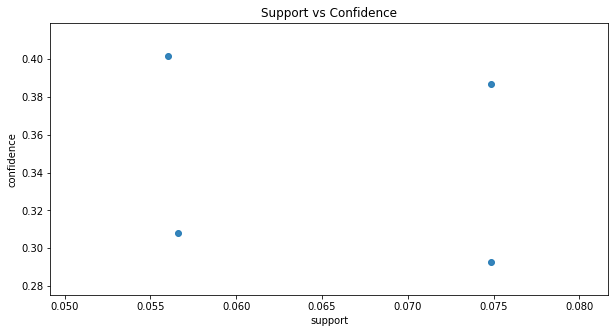

In [57]:
plt.figure(figsize=(10,5))
plt.scatter(rules1['support'], rules1['confidence'], alpha=0.9)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

In [58]:
#Using Confidence as Metric, keeping min value as 25%
rules2 = association_rules(freq_items1, metric="confidence", min_threshold=0.25)
rules2.sort_values('lift',ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
3,(yogurt),(whole milk),0.139502,0.255516,0.056024,0.401603,1.571735,0.020379,1.244132
1,(other vegetables),(whole milk),0.193493,0.255516,0.074835,0.386758,1.513634,0.025394,1.214013
0,(whole milk),(other vegetables),0.255516,0.193493,0.074835,0.292877,1.513634,0.025394,1.140548
2,(rolls/buns),(whole milk),0.183935,0.255516,0.056634,0.307905,1.205032,0.009636,1.075696


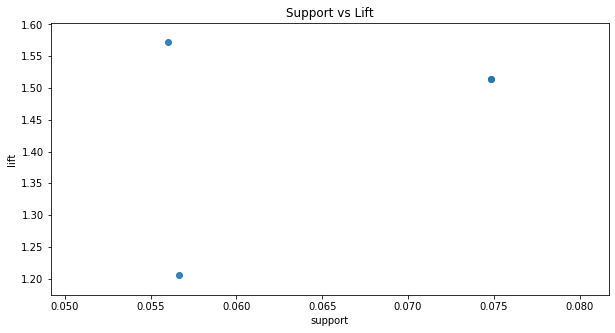

In [59]:
plt.figure(figsize=(10,5))
plt.scatter(rules2['support'], rules2['lift'], alpha=0.9)
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs Lift')
plt.show()

### Keeping min Support for Apriori as 10%

In [54]:
freq_items2 = apriori(df, min_support=0.1, use_colnames=True)
freq_items2

,support,itemsets
0,0.110524,(bottled water)
1,0.193493,(other vegetables)
2,0.183935,(rolls/buns)
3,0.108998,(root vegetables)
4,0.174377,(soda)
5,0.104931,(tropical fruit)
6,0.255516,(whole milk)
7,0.139502,(yogurt)


In [55]:
#Using Lift as Metric, keeping min value as 1
rules2 = association_rules(freq_items2, metric="lift", min_threshold=1)
rules2.sort_values('lift',ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
